**Welcome to pyLIMA (v2) tutorial 3b!**

In this tutorial you will learn how to use the pyLIMA simulator to simulate 
observations from space. We will also learn how to add parallax to our models.

Please take some time to familiarize yourself with the pyLIMA documentation.

In [1]:
### Import the required libraries.
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import os, sys

from pyLIMA import event
from pyLIMA import telescopes

Import the simulator to be used for generating the simulated light curve

In [2]:
from pyLIMA.simulations import simulator

Create a new EVENT object and give it a name.

You can also set the coordinates for an event.

In the context of the simulation, the coordinates will be used to check whether the target is observable from a specific observatory.

In [3]:
your_event = event.Event()
your_event.name = 'My simulated event'
your_event.ra = 270
your_event.dec = -30

Create some telescope(s) to observe the event from. See tutorial 3 for more details.

We will use CTIO_I (from Earth), Gaia_G and Spitzer_H (from Space):

In [4]:
CTIO_I = simulator.simulate_a_telescope('CTIO_I', your_event, 2458365.5, 2458965.5, 4, 'Earth', 'I',
                                        uniform_sampling=False, altitude=1000, longitude = -109.285399, 
                                        latitude = -27.130, bad_weather_percentage=10.0 / 100, 
                                        moon_windows_avoidance=30, minimum_alt=30)

GAIA_G = simulator.simulate_a_telescope('GAIA_G', your_event, 2458365.5, 2458965.5, 168, 'Space', 'G',
                                        uniform_sampling=True, spacecraft_name='Gaia')

SPITZER_H = simulator.simulate_a_telescope('SPITZER_H', your_event, 2458565.5, 2458765.5, 168, 'Space', 'H',
                                        uniform_sampling=True, spacecraft_name='Spitzer')

Similar to tutorial 1, we need to associate this telescopee with the event we created:

In [5]:
your_event.telescopes.append(CTIO_I)
your_event.telescopes.append(GAIA_G)
your_event.telescopes.append(SPITZER_H)

In [6]:
### Run a quick sanity check on your input.
your_event.check_event()

check_event  : Everything looks fine...


Now construct the MODEL you want to deploy:

We will use a simple point-lens point-source (PSPL) model but we will also add parallax.

This involves invoking the parallax= option when setting up our **MODEL**.

Note that here we want to give a raference date to evalueate the parallax from, and this needs to be close to t0.

In [7]:
from pyLIMA.models import PSPL_model
pspl = PSPL_model.PSPLmodel(your_event, parallax=['Full', 2458565.5])

Parallax(Full) estimated for the telescope CTIO_I: SUCCESS


/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Successfully ephemeris from JPL!
Parallax(Full) estimated for the telescope GAIA_G: SUCCESS
Successfully ephemeris from JPL!
Parallax(Full) estimated for the telescope SPITZER_H: SUCCESS


Now that the **MODEL** is there, we need to set the relevant parameters.

In [8]:
### pspl_parameters = [to, uo, tE, flux_source, flux_blend]
pspl_parameters = simulator.simulate_microlensing_model_parameters(pspl)

For the purposes of this demonstration we will set the parameters to some reasonable values.

Let's fix t0 to the value we set when we were preparing our MODEL (including parallax) above.

This is the reference date (t0_\bar) we want to evaluate the parallax from:

In [9]:
pspl_parameters[0] = 2458565.25
pspl_parameters[1:5] = [0.60, 81.50, 0.02, 0.07]

We also artificially set the source and blend fluxes of all telescopes to the same values just for plotting purposes (you don't have to do this normally):

In [10]:
pspl_parameters[5::2] = [10000.,10000.,10000.] # source fluxes
pspl_parameters[6::2] = [1000.,1000.,1000.] # blend fluxes

Transform the parameters into a pyLIMA class object. See the documentation for details.

In [11]:
pyLIMA_parameters_1 = pspl.compute_pyLIMA_parameters(pspl_parameters)

Now we have defined the **MODEL** we want to simulate, we have defined the telescope details, so we just inject these into our simulator to produce a light curve:

In [12]:
simulator.simulate_lightcurve_flux(pspl, pyLIMA_parameters_1)

Let's plot our simulated light curve using the pyLIMA plotter:

/home/ebachelet/.local/lib/python3.8/site-packages/pyLIMA-0.8.3-py3.8.egg/pyLIMA/telescopes.py:237: RuntimeWarning: divide by zero encountered in true_divide
  inv_err_flux = 1.0/err_flux


Parallax(Full) estimated for the telescope CTIO_I: SUCCESS
Parallax(Full) estimated for the telescope GAIA_G: SUCCESS
Parallax(Full) estimated for the telescope SPITZER_H: SUCCESS


/home/ebachelet/.local/lib/python3.8/site-packages/pyLIMA-0.8.3-py3.8.egg/pyLIMA/toolbox/plots.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  figure_axe.errorbar(time, mag, mag_error, fmt='.', color=color, marker=marker, label=name)
/home/ebachelet/.local/lib/python3.8/site-packages/pyLIMA-0.8.3-py3.8.egg/pyLIMA/toolbox/plots.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  figure_axe.errorbar(time, mag, mag_error, fmt='.', color=color, marker=marker, label=name)
/home/ebachelet/.local/lib/python3.8/site-packages/pyLIMA-0.8.3-py3.8.egg/pyLIMA/toolbox/plots.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  figure_axe.errorbar(time, mag

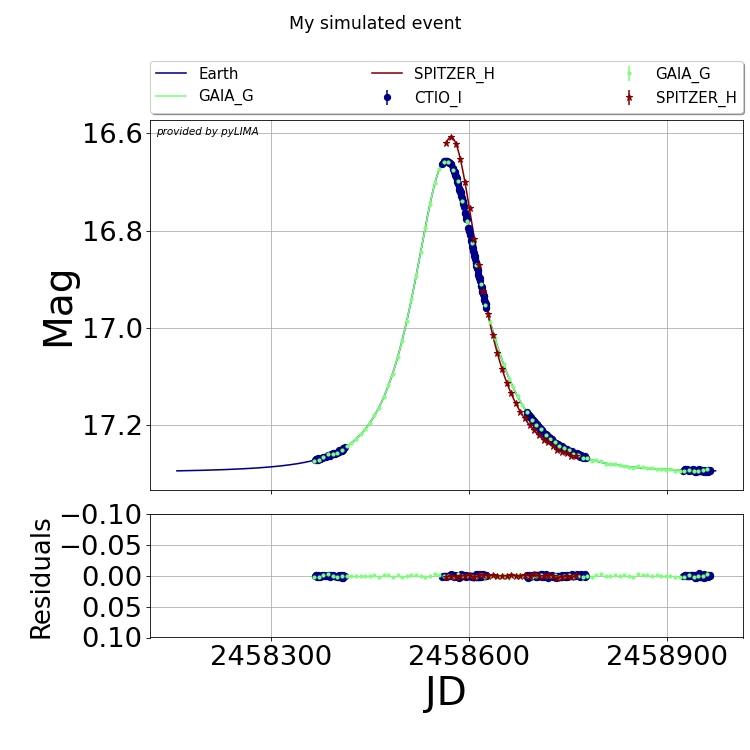

In [13]:
from pyLIMA.outputs import pyLIMA_plots
pyLIMA_plots.plot_lightcurves(pspl, pspl_parameters)

Let's look at the source trajectory looks like from Earth and Space:

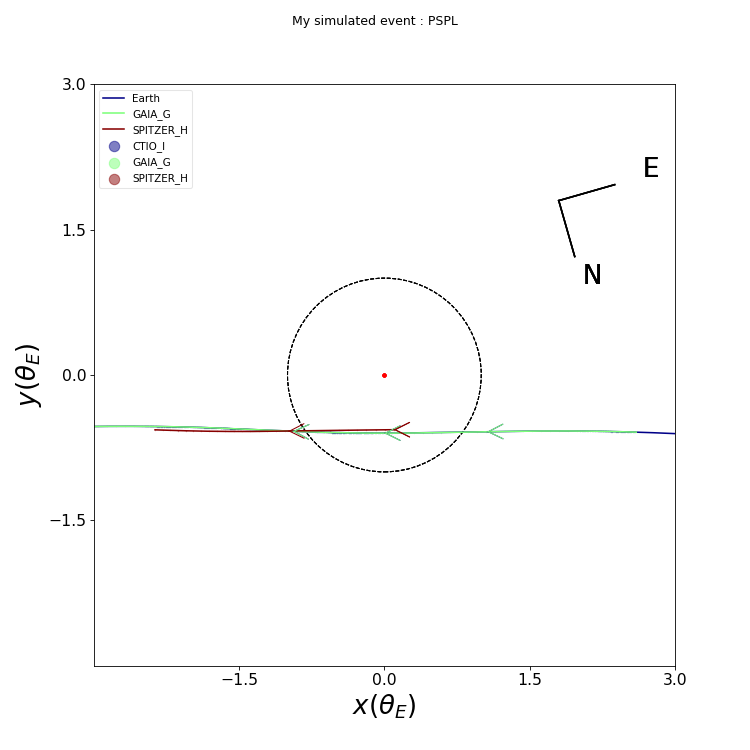

In [14]:
pyLIMA_plots.plot_geometry(pspl, pspl_parameters)
plt.show()

This concludes tutorial 3b.